# Pipeline: Infrastructures of Extraction in LA County

### **Research Question**: What can we learn about the economic geography of Southern California from examining the ecological and social costs of extraction in Los Angeles county?

### Structure of the combined notebook:
    1. Lillian's work on school expulsion data
    2. Jeremy's work on oil spill data
    3. Our combined analysis incorporating both sets
    

## 1. School Expulsion Data Exploration

In this notebook I will be exploring and joining 2 datasets from the California Department of Education. The first dataset is school expulsion data listing expulsions for each school, which is the 'substantive' dataset, which doesn't contain any geometry. The second dataset contains the geometry data, in the form of angular latitude and longitude coordinates. I will ultimately be merging both together by a shared attribute 'school code.' I have pre-filtered both datasets to only include schools located within L.A. County before importing into Jupyter Notebooks.


## School Expulsion Data

This data from the California Department of Education can be found [here](https://www.cde.ca.gov/ds/ad/filesed.asp), and its documentation can be found [here](https://www.cde.ca.gov/ds/ad/fsed.asp). I have pre-filtered this dataset the reporting category 'TA' before importing into Jupyter Notebooks.

Steps:
* look at the data
* clean the data, including adding a CDSCode column to the School Expulsion Data
* filter the data

### Looking at the Data

In [2]:
# first, import the pandas library
import geopandas as gpd

# next, import the school expulsion data
expgdf = gpd.read_file('exp1920_LA.csv')

In [3]:
expgdf.head()

,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,...,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),Expulsion Count Violent Incident (No Injury),Expulsion Count Weapons Possession,Expulsion Count Illicit Drug-Related,Expulsion Count Defiance-Only,Expulsion Count Other Reasons,geometry
0,2019-20,S,19,64212,1995596,Los Angeles,ABC Unified,ABC Secondary (Alternative),No,TA,...,0,0,0,0,0,0,0,0,0,None
1,2019-20,S,19,64212,6010862,Los Angeles,ABC Unified,Aloha Elementary,No,TA,...,0,0,0,0,0,0,0,0,0,None
2,2019-20,S,19,64212,1930361,Los Angeles,ABC Unified,Artesia High,No,TA,...,0,0,0,0,0,0,0,0,0,None
3,2019-20,S,19,64212,6071369,Los Angeles,ABC Unified,Bragg Elementary,No,TA,...,0,0,0,0,0,0,0,0,0,None
4,2019-20,S,19,64212,6010953,Los Angeles,ABC Unified,Burbank (Luther) Elementary,No,TA,...,0,0,0,0,0,0,0,0,0,None


In [4]:
# check the column names
expgdf.columns

Index(['AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode',
       'SchoolCode', 'CountyName', 'DistrictName', 'SchoolName', 'CharterYN',
       'ReportingCategory', 'CumulativeEnrollment', 'Total Expulsions',
       'Unduplicated Count of Students Expelled (Total)',
       'Unduplicated Count of Students Expelled (Defiance-Only)',
       'Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)',
       'Expulsion Count Violent Incident (No Injury)',
       'Expulsion Count Weapons Possession',
       'Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only',
       'Expulsion Count Other Reasons', 'geometry'],
      dtype='object')

In [5]:
# check the types of each column
expgdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 22 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   AcademicYear                                             2310 non-null   object  
 1   AggregateLevel                                           2310 non-null   object  
 2   CountyCode                                               2310 non-null   object  
 3   DistrictCode                                             2310 non-null   object  
 4   SchoolCode                                               2310 non-null   object  
 5   CountyName                                               2310 non-null   object  
 6   DistrictName                                             2310 non-null   object  
 7   SchoolName                                               2310 non-null   object  
 8   CharterYN 

### Clean the Data

In [6]:
# ensure that all the County Code, District Code, and School Code columns have the correct amount of characters by filling in leading 0's
expgdf['CountyCode'] = expgdf['CountyCode'].str.zfill(2)
expgdf['DistrictCode'] = expgdf['DistrictCode'].str.zfill(5)
expgdf['SchoolCode'] = expgdf['SchoolCode'].str.zfill(7)

In [7]:
# add a column that concatenates the County Code, District Code, and School Code to get a new 'CDSCode' that will match the other dataset.
expgdf['CDSCode'] = expgdf['CountyCode'] + expgdf['DistrictCode'] + expgdf['SchoolCode']

expgdf.info()
expgdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   AcademicYear                                             2310 non-null   object  
 1   AggregateLevel                                           2310 non-null   object  
 2   CountyCode                                               2310 non-null   object  
 3   DistrictCode                                             2310 non-null   object  
 4   SchoolCode                                               2310 non-null   object  
 5   CountyName                                               2310 non-null   object  
 6   DistrictName                                             2310 non-null   object  
 7   SchoolName                                               2310 non-null   object  
 8   CharterYN 

,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,...,Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),Expulsion Count Violent Incident (No Injury),Expulsion Count Weapons Possession,Expulsion Count Illicit Drug-Related,Expulsion Count Defiance-Only,Expulsion Count Other Reasons,geometry,CDSCode
0,2019-20,S,19,64212,1995596,Los Angeles,ABC Unified,ABC Secondary (Alternative),No,TA,...,0,0,0,0,0,0,0,0,None,19642121995596
1,2019-20,S,19,64212,6010862,Los Angeles,ABC Unified,Aloha Elementary,No,TA,...,0,0,0,0,0,0,0,0,None,19642126010862
2,2019-20,S,19,64212,1930361,Los Angeles,ABC Unified,Artesia High,No,TA,...,0,0,0,0,0,0,0,0,None,19642121930361
3,2019-20,S,19,64212,6071369,Los Angeles,ABC Unified,Bragg Elementary,No,TA,...,0,0,0,0,0,0,0,0,None,19642126071369
4,2019-20,S,19,64212,6010953,Los Angeles,ABC Unified,Burbank (Luther) Elementary,No,TA,...,0,0,0,0,0,0,0,0,None,19642126010953


In [8]:
# expulsion counts and CDSCode should be expressed as int
int_indices = [11,12,13,15,16,17,18,19,20,22]
for x in int_indices:
    expgdf.iloc[:,x] = expgdf.iloc[:,x].astype(int)
    
# expulsion rate should be expressed as a float
expgdf.iloc[:,14] = expgdf.iloc[:,14].astype(float)

expgdf.dtypes

AcademicYear                                                 object
AggregateLevel                                               object
CountyCode                                                   object
DistrictCode                                                 object
SchoolCode                                                   object
CountyName                                                   object
DistrictName                                                 object
SchoolName                                                   object
CharterYN                                                    object
ReportingCategory                                            object
CumulativeEnrollment                                         object
Total Expulsions                                              int64
Unduplicated Count of Students Expelled (Total)               int64
Unduplicated Count of Students Expelled (Defiance-Only)       int64
Expulsion Rate (Total)                          

In [9]:
expgdf.DistrictCode.value_counts()

64733    1009
64725      87
73437      43
64907      43
73445      37
         ... 
77289       1
76968       1
76992       1
75663       1
75697       1
Name: DistrictCode, Length: 87, dtype: int64

### Filter the Data
Now that our data is appropriately typed, we can filter them based on value.

In [17]:
# Only include data for schools with expulsions greater than 0.
expgdf_filtered = expgdf[expgdf['Total Expulsions']>0]
expgdf_filtered.reset_index(inplace = True)
expgdf_filtered.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 24 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   index                                                    154 non-null    int64   
 1   AcademicYear                                             154 non-null    object  
 2   AggregateLevel                                           154 non-null    object  
 3   CountyCode                                               154 non-null    object  
 4   DistrictCode                                             154 non-null    object  
 5   SchoolCode                                               154 non-null    object  
 6   CountyName                                               154 non-null    object  
 7   DistrictName                                             154 non-null    object  
 8   SchoolName  

In [18]:
expgdf_filtered.columns

Index(['index', 'AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode',
       'SchoolCode', 'CountyName', 'DistrictName', 'SchoolName', 'CharterYN',
       'ReportingCategory', 'CumulativeEnrollment', 'Total Expulsions',
       'Unduplicated Count of Students Expelled (Total)',
       'Unduplicated Count of Students Expelled (Defiance-Only)',
       'Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)',
       'Expulsion Count Violent Incident (No Injury)',
       'Expulsion Count Weapons Possession',
       'Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only',
       'Expulsion Count Other Reasons', 'geometry', 'CDSCode'],
      dtype='object')

Notice this filtering reduced the overall number of entries from 2310 to 154!

In [19]:
# filter the columns
new_columns = ['DistrictName', 'SchoolName', 'CharterYN',
               'ReportingCategory', 'CumulativeEnrollment', 'Total Expulsions',
               'Unduplicated Count of Students Expelled (Total)',
               'Unduplicated Count of Students Expelled (Defiance-Only)',
               'Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)',
               'Expulsion Count Violent Incident (No Injury)',
               'Expulsion Count Weapons Possession',
               'Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only',
               'Expulsion Count Other Reasons', 'geometry','CDSCode']

expgdf_filtered = expgdf_filtered[new_columns]
expgdf_filtered.head()

,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,Total Expulsions,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),Expulsion Count Violent Incident (No Injury),Expulsion Count Weapons Possession,Expulsion Count Illicit Drug-Related,Expulsion Count Defiance-Only,Expulsion Count Other Reasons,geometry,CDSCode
0,Alhambra Unified,Alhambra High,No,TA,2426,4,4,0,0.2,2,0,1,1,0,0,None,19757131930163
1,Alhambra Unified,Mark Keppel High,No,TA,2312,1,1,0,0.0,0,0,0,0,0,1,None,19757131934553
2,Alhambra Unified,San Gabriel High,No,TA,2094,7,7,0,0.3,0,7,0,0,0,0,None,19757131937697
3,Antelope Valley Union High,Antelope Valley High,No,TA,1809,4,4,0,0.2,1,1,2,0,0,0,None,19642461930213
4,Antelope Valley Union High,Eastside High,No,TA,2798,2,2,0,0.1,0,1,1,0,0,0,None,19642460108407


I want to add some columns in the school expulsion dataset that will help with data analysis. In particular, I want columns that contain the most frequent reason for expulsion for each school. 

In [20]:
# add a column for total expulsion count violent incidents
expgdf_filtered['Expulsion Count Violent Incident Total'] = expgdf_filtered['Expulsion Count Violent Incident (Injury)'] + expgdf_filtered['Expulsion Count Violent Incident (No Injury)']
expgdf_filtered.info()
expgdf_filtered.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   DistrictName                                             154 non-null    object  
 1   SchoolName                                               154 non-null    object  
 2   CharterYN                                                154 non-null    object  
 3   ReportingCategory                                        154 non-null    object  
 4   CumulativeEnrollment                                     154 non-null    object  
 5   Total Expulsions                                         154 non-null    int64   
 6   Unduplicated Count of Students Expelled (Total)          154 non-null    int64   
 7   Unduplicated Count of Students Expelled (Defiance-Only)  154 non-null    int64   
 8   Expulsion Ra

,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,Total Expulsions,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),Expulsion Count Violent Incident (No Injury),Expulsion Count Weapons Possession,Expulsion Count Illicit Drug-Related,Expulsion Count Defiance-Only,Expulsion Count Other Reasons,geometry,CDSCode,Expulsion Count Violent Incident Total
0,Alhambra Unified,Alhambra High,No,TA,2426,4,4,0,0.2,2,0,1,1,0,0,None,19757131930163,2
1,Alhambra Unified,Mark Keppel High,No,TA,2312,1,1,0,0.0,0,0,0,0,0,1,None,19757131934553,0
2,Alhambra Unified,San Gabriel High,No,TA,2094,7,7,0,0.3,0,7,0,0,0,0,None,19757131937697,7
3,Antelope Valley Union High,Antelope Valley High,No,TA,1809,4,4,0,0.2,1,1,2,0,0,0,None,19642461930213,2
4,Antelope Valley Union High,Eastside High,No,TA,2798,2,2,0,0.1,0,1,1,0,0,0,None,19642460108407,1


In [21]:
# create a new column that is index of "dominant" reason for expulsion.
# this will be determined by which "reason" column has the highest count.
# in the case of a tie, choose the first instance of the maximum count in the below list:

new_columns = ["Expulsion Count Violent Incident Total",
       "Expulsion Count Weapons Possession",
       "Expulsion Count Illicit Drug-Related", 
        "Expulsion Count Defiance-Only",
       "Expulsion Count Other Reasons"]

# put the relevant counts into a new dataframe
expulsionreason_df = expgdf_filtered[new_columns]

# now get the index of the maximum value
expgdf_filtered["Dominant Reason"] = expulsionreason_df.idxmax(axis="columns")

In [22]:
# dictionary in which the key is the column index, and the value is the associated string describing the expulsion reason
expulsion_type_strings_lookup = {"Expulsion Count Violent Incident Total": "Violent Incident",
 "Expulsion Count Weapons Possession": "Weapons Possession", 
 "Expulsion Count Illicit Drug-Related": "Illicit Drug-Related", 
 "Expulsion Count Defiance-Only": "Defiance", 
 "Expulsion Count Other Reasons": "Other"}

# use this dictionary to replace with shorter strings
expgdf_filtered['Dominant Reason String'] = expgdf_filtered["Dominant Reason"].map(expulsion_type_strings_lookup)

# inspect the results
print(expgdf_filtered['Dominant Reason'])
expgdf_filtered.head()

0      Expulsion Count Violent Incident Total
1               Expulsion Count Other Reasons
2      Expulsion Count Violent Incident Total
3      Expulsion Count Violent Incident Total
4      Expulsion Count Violent Incident Total
                        ...                  
149      Expulsion Count Illicit Drug-Related
150      Expulsion Count Illicit Drug-Related
151      Expulsion Count Illicit Drug-Related
152      Expulsion Count Illicit Drug-Related
153      Expulsion Count Illicit Drug-Related
Name: Dominant Reason, Length: 154, dtype: object


,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,Total Expulsions,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),Expulsion Count Violent Incident (No Injury),Expulsion Count Weapons Possession,Expulsion Count Illicit Drug-Related,Expulsion Count Defiance-Only,Expulsion Count Other Reasons,geometry,CDSCode,Expulsion Count Violent Incident Total,Dominant Reason,Dominant Reason String
0,Alhambra Unified,Alhambra High,No,TA,2426,4,4,0,0.2,2,0,1,1,0,0,None,19757131930163,2,Expulsion Count Violent Incident Total,Violent Incident
1,Alhambra Unified,Mark Keppel High,No,TA,2312,1,1,0,0.0,0,0,0,0,0,1,None,19757131934553,0,Expulsion Count Other Reasons,Other
2,Alhambra Unified,San Gabriel High,No,TA,2094,7,7,0,0.3,0,7,0,0,0,0,None,19757131937697,7,Expulsion Count Violent Incident Total,Violent Incident
3,Antelope Valley Union High,Antelope Valley High,No,TA,1809,4,4,0,0.2,1,1,2,0,0,0,None,19642461930213,2,Expulsion Count Violent Incident Total,Violent Incident
4,Antelope Valley Union High,Eastside High,No,TA,2798,2,2,0,0.1,0,1,1,0,0,0,None,19642460108407,1,Expulsion Count Violent Incident Total,Violent Incident


## School Directory Data

This [dataset](https://www.cde.ca.gov/ds/si/ds/pubschls.asp ), also provided by the CA Department of Education, contains information about each school in the dataset - importantly, it contains the latitude and longitude! The documentation can be found [here](https://www.cde.ca.gov/ds/si/ds/fspubschls.asp).

### Looking at the Data

In [23]:
# next, import the school directory data
schoolgdf = gpd.read_file('pubschls_LA.csv')

schoolgdf.info()
schoolgdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CDSCode               3722 non-null   object  
 1   NCESDist              3722 non-null   object  
 2   NCESSchool            3722 non-null   object  
 3   StatusType            3722 non-null   object  
 4   County                3722 non-null   object  
 5   District              3722 non-null   object  
 6   School                3722 non-null   object  
 7   Street                3722 non-null   object  
 8   StreetAbr             3722 non-null   object  
 9   City                  3722 non-null   object  
 10  Zip                   3722 non-null   object  
 11  State                 3722 non-null   object  
 12  MailStreet            3722 non-null   object  
 13  MailStrAbr            3722 non-null   object  
 14  MailCity              3722 non-null   object  
 

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,geometry
0,19101990000000,0691078,No Data,Active,Los Angeles,Los Angeles County Office of Education,No Data,9300 Imperial Highway,9300 Imperial Hwy.,Downey,...,No Data,No Data,No Data,33.916978,-118.12860,Debra,Duardo,duardo_debra@lacoe.edu,4/2/2019,None
1,19101990100776,0691078,11339,Active,Los Angeles,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,...,N,N,0601564,34.234622,-118.39656,Mark,Ryan,mryan@novamil.org,8/13/2020,None
2,19101990102145,0691078,11343,Closed,Los Angeles,Los Angeles County Office of Education,Progressive Education Entrepreneurial Charter,2600 South LaBrea Avenue,2600 South LaBrea Ave.,Los Angeles,...,No Data,Y,No Data,No Data,No Data,No Data,No Data,No Data,1/30/2009,None
3,19101990106880,0691078,10853,Active,Los Angeles,Los Angeles County Office of Education,Jardin de la Infancia,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",Los Angeles,...,N,N,0602019,34.035321,-118.26241,Zuzy,Chavez,jardindelainfancia@me.com,8/31/2021,None
4,19101990109660,0691078,10891,Active,Los Angeles,Los Angeles County Office of Education,Aspire Antonio Maria Lugo Academy,6100 Carmelita Avenue,6100 Carmelita Ave.,Huntington Park,...,N,N,0601821,33.984203,-118.19659,Dawn,Barnes,data-contact@aspirepublicschools.org,12/30/2020,None


### Cleaning the Data

In [24]:
# CDS Code in row 0 should be expressed as an int so we can eventually compare and join with the other dataset
schoolgdf.iloc[:,0] = schoolgdf.iloc[:,0].astype(int)

In [25]:
import numpy as np

# replace all 'No Data' entries as NaN
schoolgdf_cleaned = schoolgdf.replace('No Data',np.NaN)

# convert the Lat & Lon to values so they can be used for geometry
schoolgdf_cleaned['Longitude'] = schoolgdf_cleaned['Longitude'].astype(float)
schoolgdf_cleaned['Latitude'] = schoolgdf_cleaned['Latitude'].astype(float)

# now check that there are null values, and that they are represented in the Lat & Lon columns
schoolgdf_cleaned.info()
schoolgdf_cleaned.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CDSCode               3722 non-null   int64   
 1   NCESDist              3349 non-null   object  
 2   NCESSchool            2714 non-null   object  
 3   StatusType            3722 non-null   object  
 4   County                3722 non-null   object  
 5   District              3722 non-null   object  
 6   School                3594 non-null   object  
 7   Street                3670 non-null   object  
 8   StreetAbr             3670 non-null   object  
 9   City                  3670 non-null   object  
 10  Zip                   3670 non-null   object  
 11  State                 3670 non-null   object  
 12  MailStreet            3670 non-null   object  
 13  MailStrAbr            3670 non-null   object  
 14  MailCity              3670 non-null   object  
 

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,geometry
0,19101990000000,0691078,NaN,Active,Los Angeles,Los Angeles County Office of Education,NaN,9300 Imperial Highway,9300 Imperial Hwy.,Downey,...,NaN,NaN,NaN,33.916978,-118.12860,Debra,Duardo,duardo_debra@lacoe.edu,4/2/2019,None
1,19101990100776,0691078,11339,Active,Los Angeles,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,...,N,N,0601564,34.234622,-118.39656,Mark,Ryan,mryan@novamil.org,8/13/2020,None
2,19101990102145,0691078,11343,Closed,Los Angeles,Los Angeles County Office of Education,Progressive Education Entrepreneurial Charter,2600 South LaBrea Avenue,2600 South LaBrea Ave.,Los Angeles,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,1/30/2009,None
3,19101990106880,0691078,10853,Active,Los Angeles,Los Angeles County Office of Education,Jardin de la Infancia,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",Los Angeles,...,N,N,0602019,34.035321,-118.26241,Zuzy,Chavez,jardindelainfancia@me.com,8/31/2021,None
4,19101990109660,0691078,10891,Active,Los Angeles,Los Angeles County Office of Education,Aspire Antonio Maria Lugo Academy,6100 Carmelita Avenue,6100 Carmelita Ave.,Huntington Park,...,N,N,0601821,33.984203,-118.19659,Dawn,Barnes,data-contact@aspirepublicschools.org,12/30/2020,None


In [26]:
# populate column for geometry
schoolgdf_cleaned['geometry'] = gpd.points_from_xy(schoolgdf_cleaned.Longitude, schoolgdf_cleaned.Latitude)

# now the geometry points that are created from Lat/Lon will be [NaN Nan], which is an invalid geometry
# replace these invalid geometries with NaN
schoolgdf_cleaned['geometry'][~schoolgdf_cleaned['geometry'].is_valid]=np.NaN

# check that the same number of non-null lat/lon values are represented in the geometry column!
schoolgdf_cleaned.info()
schoolgdf_cleaned.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CDSCode               3722 non-null   int64   
 1   NCESDist              3349 non-null   object  
 2   NCESSchool            2714 non-null   object  
 3   StatusType            3722 non-null   object  
 4   County                3722 non-null   object  
 5   District              3722 non-null   object  
 6   School                3594 non-null   object  
 7   Street                3670 non-null   object  
 8   StreetAbr             3670 non-null   object  
 9   City                  3670 non-null   object  
 10  Zip                   3670 non-null   object  
 11  State                 3670 non-null   object  
 12  MailStreet            3670 non-null   object  
 13  MailStrAbr            3670 non-null   object  
 14  MailCity              3670 non-null   object  
 

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,geometry
0,19101990000000,0691078,NaN,Active,Los Angeles,Los Angeles County Office of Education,NaN,9300 Imperial Highway,9300 Imperial Hwy.,Downey,...,NaN,NaN,NaN,33.916978,-118.12860,Debra,Duardo,duardo_debra@lacoe.edu,4/2/2019,POINT (-118.12860 33.91698)
1,19101990100776,0691078,11339,Active,Los Angeles,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,...,N,N,0601564,34.234622,-118.39656,Mark,Ryan,mryan@novamil.org,8/13/2020,POINT (-118.39656 34.23462)
2,19101990102145,0691078,11343,Closed,Los Angeles,Los Angeles County Office of Education,Progressive Education Entrepreneurial Charter,2600 South LaBrea Avenue,2600 South LaBrea Ave.,Los Angeles,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,1/30/2009,None
3,19101990106880,0691078,10853,Active,Los Angeles,Los Angeles County Office of Education,Jardin de la Infancia,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",Los Angeles,...,N,N,0602019,34.035321,-118.26241,Zuzy,Chavez,jardindelainfancia@me.com,8/31/2021,POINT (-118.26241 34.03532)
4,19101990109660,0691078,10891,Active,Los Angeles,Los Angeles County Office of Education,Aspire Antonio Maria Lugo Academy,6100 Carmelita Avenue,6100 Carmelita Ave.,Huntington Park,...,N,N,0601821,33.984203,-118.19659,Dawn,Barnes,data-contact@aspirepublicschools.org,12/30/2020,POINT (-118.19659 33.98420)


### Filtering the Data

only keep the columns we want!

In [27]:
# filter the columns
schoolgdf_cleaned.columns

Index(['CDSCode', 'NCESDist', 'NCESSchool', 'StatusType', 'County', 'District',
       'School', 'Street', 'StreetAbr', 'City', 'Zip', 'State', 'MailStreet',
       'MailStrAbr', 'MailCity', 'MailZip', 'MailState', 'Phone', 'Ext',
       'FaxNumber', 'Email', 'WebSite', 'OpenDate', 'ClosedDate', 'Charter',
       'CharterNum', 'FundingType', 'DOC', 'DOCType', 'SOC', 'SOCType',
       'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved',
       'Virtual', 'Magnet', 'YearRoundYN', 'FederalDFCDistrictID', 'Latitude',
       'Longitude', 'AdmFName', 'AdmLName', 'AdmEmail', 'LastUpDate',
       'geometry'],
      dtype='object')

In [28]:
# Now, filter out the schools that aren't active!
print(schoolgdf_cleaned.shape)
schoolgdf_filtered_cleaned = schoolgdf_cleaned[schoolgdf_cleaned['StatusType']=='Active']
print(schoolgdf_filtered_cleaned.shape)
schoolgdf_filtered_cleaned.head()

(3722, 48)
(2379, 48)


,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,geometry
0,19101990000000,0691078,NaN,Active,Los Angeles,Los Angeles County Office of Education,NaN,9300 Imperial Highway,9300 Imperial Hwy.,Downey,...,NaN,NaN,NaN,33.916978,-118.12860,Debra,Duardo,duardo_debra@lacoe.edu,4/2/2019,POINT (-118.12860 33.91698)
1,19101990100776,0691078,11339,Active,Los Angeles,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,...,N,N,0601564,34.234622,-118.39656,Mark,Ryan,mryan@novamil.org,8/13/2020,POINT (-118.39656 34.23462)
3,19101990106880,0691078,10853,Active,Los Angeles,Los Angeles County Office of Education,Jardin de la Infancia,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",Los Angeles,...,N,N,0602019,34.035321,-118.26241,Zuzy,Chavez,jardindelainfancia@me.com,8/31/2021,POINT (-118.26241 34.03532)
4,19101990109660,0691078,10891,Active,Los Angeles,Los Angeles County Office of Education,Aspire Antonio Maria Lugo Academy,6100 Carmelita Avenue,6100 Carmelita Ave.,Huntington Park,...,N,N,0601821,33.984203,-118.19659,Dawn,Barnes,data-contact@aspirepublicschools.org,12/30/2020,POINT (-118.19659 33.98420)
6,19101990112128,0691078,11655,Active,Los Angeles,Los Angeles County Office of Education,Aspire Ollin University Preparatory Academy,2540 East 58th Street,2540 East 58th St.,Huntington Park,...,N,N,0601857,33.990154,-118.22653,Joel,Ramirez,data-contact@aspirepublicschools.org,8/13/2020,POINT (-118.22653 33.99015)


In [29]:
schoolgdf_filtered_cleaned = schoolgdf_cleaned

keep_columns = ['CDSCode', 'District',
       'School', 'Street', 'StreetAbr', 'City', 'Zip', 'State', 'MailStreet',
       'MailStrAbr', 'MailCity', 'MailZip', 'MailState', 'Email', 'WebSite', 'Charter',
       'CharterNum', 'FundingType', 'DOC', 'DOCType', 'SOC', 'SOCType',
       'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved',
       'Virtual', 'Magnet', 'YearRoundYN', 'FederalDFCDistrictID', 'Latitude',
       'Longitude', 'LastUpDate','geometry']
schoolgdf_filtered_cleaned = schoolgdf_filtered_cleaned[keep_columns]
schoolgdf_filtered_cleaned.head()

,CDSCode,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,...,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,LastUpDate,geometry
0,19101990000000,Los Angeles County Office of Education,NaN,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242-2890,CA,9300 Imperial Highway,9300 Imperial Hwy.,...,NaN,NaN,NaN,NaN,NaN,NaN,33.916978,-118.12860,4/2/2019,POINT (-118.12860 33.91698)
1,19101990100776,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,91352,CA,"8309 Laurel Canyon Boulevard, #295","8309 Laurel Canyon Blvd., #295",...,6-12,6-12,C,N,N,0601564,34.234622,-118.39656,8/13/2020,POINT (-118.39656 34.23462)
2,19101990102145,Los Angeles County Office of Education,Progressive Education Entrepreneurial Charter,2600 South LaBrea Avenue,2600 South LaBrea Ave.,Los Angeles,90016,CA,2600 S. La Brea Avenue,2600 S. La Brea Ave.,...,6-12,6-10,NaN,NaN,Y,NaN,NaN,NaN,1/30/2009,None
3,19101990106880,Los Angeles County Office of Education,Jardin de la Infancia,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",Los Angeles,90015-2209,CA,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",...,K-1,K-1,N,N,N,0602019,34.035321,-118.26241,8/31/2021,POINT (-118.26241 34.03532)
4,19101990109660,Los Angeles County Office of Education,Aspire Antonio Maria Lugo Academy,6100 Carmelita Avenue,6100 Carmelita Ave.,Huntington Park,90255-4138,CA,"1001 22nd Avenue, Suite 100","1001 22nd Ave., Ste. 100",...,K-6,K-5,N,N,N,0601821,33.984203,-118.19659,12/30/2020,POINT (-118.19659 33.98420)


I'm intentionally keeping some of the columns that will have redundant data when combined with the first dataset, so that I can do a spot check to verify the join. However, I do want to be able to differentiate these columns, so I'll rename them for clarity.

In [30]:
renamed_columns = ['CDSCode', 'Directory_District',
       'Directory_School', 'Street', 'StreetAbr', 'City', 'Zip', 'State', 'MailStreet',
       'MailStrAbr', 'MailCity', 'MailZip', 'MailState', 'Email', 'WebSite', 'Directory_Charter',
       'CharterNum', 'FundingType', 'DOC', 'DOCType', 'SOC', 'SOCType',
       'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved',
       'Virtual', 'Magnet', 'YearRoundYN', 'FederalDFCDistrictID', 'Latitude',
       'Longitude', 'LastUpDate','geometry']

schoolgdf_filtered_cleaned.columns = renamed_columns;
schoolgdf_filtered_cleaned.head()

,CDSCode,Directory_District,Directory_School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,...,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,LastUpDate,geometry
0,19101990000000,Los Angeles County Office of Education,NaN,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242-2890,CA,9300 Imperial Highway,9300 Imperial Hwy.,...,NaN,NaN,NaN,NaN,NaN,NaN,33.916978,-118.12860,4/2/2019,POINT (-118.12860 33.91698)
1,19101990100776,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,91352,CA,"8309 Laurel Canyon Boulevard, #295","8309 Laurel Canyon Blvd., #295",...,6-12,6-12,C,N,N,0601564,34.234622,-118.39656,8/13/2020,POINT (-118.39656 34.23462)
2,19101990102145,Los Angeles County Office of Education,Progressive Education Entrepreneurial Charter,2600 South LaBrea Avenue,2600 South LaBrea Ave.,Los Angeles,90016,CA,2600 S. La Brea Avenue,2600 S. La Brea Ave.,...,6-12,6-10,NaN,NaN,Y,NaN,NaN,NaN,1/30/2009,None
3,19101990106880,Los Angeles County Office of Education,Jardin de la Infancia,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",Los Angeles,90015-2209,CA,"1400 S Broadway Los Angeles, CA 90015","1400 S Broadway Los Angeles, CA 90015",...,K-1,K-1,N,N,N,0602019,34.035321,-118.26241,8/31/2021,POINT (-118.26241 34.03532)
4,19101990109660,Los Angeles County Office of Education,Aspire Antonio Maria Lugo Academy,6100 Carmelita Avenue,6100 Carmelita Ave.,Huntington Park,90255-4138,CA,"1001 22nd Avenue, Suite 100","1001 22nd Ave., Ste. 100",...,K-6,K-5,N,N,N,0601821,33.984203,-118.19659,12/30/2020,POINT (-118.19659 33.98420)


### Mapping the data

In [31]:
# import libraries for mapping
import contextily as ctx
import matplotlib.pyplot as plt

In [32]:
# Set the CRS
schoolgdf_filtered_cleaned.set_crs(epsg=4326, inplace=True)
schoolgdf_filtered_cleaned.crs

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

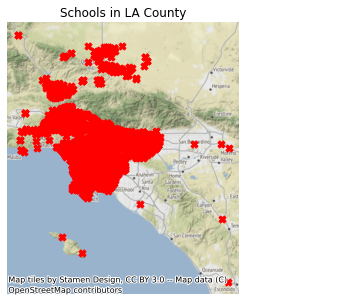

In [33]:
# reproject to web mercator
schoolgdf_web_mercator = schoolgdf_filtered_cleaned.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(15,5))

schoolgdf_web_mercator.plot(ax=ax, 
                      marker='X',
                      markersize=50,
                      color='red')

ax.axis('off')

ax.set_title('Schools in LA County')

ctx.add_basemap(ax)

So much red! Oh well, once I join the data it should be filtered down to just the schools that have expulsions.

## Joining the Data

And finally, I will be merging the two datasets using [this merge() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge).
* join the datasets by attribute: CDSCode
* map the combined data

In [34]:
expgdf_filtered.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   DistrictName                                             154 non-null    object  
 1   SchoolName                                               154 non-null    object  
 2   CharterYN                                                154 non-null    object  
 3   ReportingCategory                                        154 non-null    object  
 4   CumulativeEnrollment                                     154 non-null    object  
 5   Total Expulsions                                         154 non-null    int64   
 6   Unduplicated Count of Students Expelled (Total)          154 non-null    int64   
 7   Unduplicated Count of Students Expelled (Defiance-Only)  154 non-null    int64   
 8   Expulsion Ra

In [35]:
# reminder of what the datasets look like
schoolgdf_filtered_cleaned.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CDSCode               3722 non-null   int64   
 1   Directory_District    3722 non-null   object  
 2   Directory_School      3594 non-null   object  
 3   Street                3670 non-null   object  
 4   StreetAbr             3670 non-null   object  
 5   City                  3670 non-null   object  
 6   Zip                   3670 non-null   object  
 7   State                 3670 non-null   object  
 8   MailStreet            3670 non-null   object  
 9   MailStrAbr            3670 non-null   object  
 10  MailCity              3670 non-null   object  
 11  MailZip               3670 non-null   object  
 12  MailState             3670 non-null   object  
 13  Email                 500 non-null    object  
 14  WebSite               1898 non-null   object  
 

In [36]:

expgdf_filtered_final = expgdf_filtered
schoolgdf_final = schoolgdf_filtered_cleaned

# check the size of each dataset
print(schoolgdf_filtered_cleaned.shape)
print(expgdf_filtered_final.shape)

# merge the datasets
expgdf_filtered_final = expgdf_filtered_final.merge(schoolgdf_filtered_cleaned, # left dataset = expulsions, right dataset = schools
                                                    on='CDSCode', # the column to merge with
                                                    how='left', # use a left outer join, which means all of the entries in expulsions will be preserved
                                                    indicator=True) # create a new column '_merge' that tells us how the merge went

# check the size of each dataset
print(schoolgdf_filtered_cleaned.shape)
print(expgdf_filtered_final.shape)

(3722, 36)
(154, 20)
(3722, 36)
(154, 56)


From the size of the new dataset, all 154 entries from the original expulsion dataset seem to have merged! Yay!

### Checking the Merge

I did a couple of checks to make sure that the merge generally went smoothly.


In [37]:
# reminder of what the datasets look like
expgdf_filtered_final.columns

Index(['DistrictName', 'SchoolName', 'CharterYN', 'ReportingCategory',
       'CumulativeEnrollment', 'Total Expulsions',
       'Unduplicated Count of Students Expelled (Total)',
       'Unduplicated Count of Students Expelled (Defiance-Only)',
       'Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)',
       'Expulsion Count Violent Incident (No Injury)',
       'Expulsion Count Weapons Possession',
       'Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only',
       'Expulsion Count Other Reasons', 'geometry_x', 'CDSCode',
       'Expulsion Count Violent Incident Total', 'Dominant Reason',
       'Dominant Reason String', 'Directory_District', 'Directory_School',
       'Street', 'StreetAbr', 'City', 'Zip', 'State', 'MailStreet',
       'MailStrAbr', 'MailCity', 'MailZip', 'MailState', 'Email', 'WebSite',
       'Directory_Charter', 'CharterNum', 'FundingType', 'DOC', 'DOCType',
       'SOC', 'SOCType', 'EdOpsCode', 'EdOpsName', 'EILCode', 'EILNa

According to the documentation, we can use this **_merge** column to determine the success of the merge, and debug the issue if it was unsuccessful. I have displayed it below, along with the school name and **CDSCode** to see if there's anything funky about the ones that were missing.

In [38]:
# pd.set_option('display.max_rows', None) # display all rows
expgdf_filtered_final[['SchoolName','CDSCode','_merge']]

,SchoolName,CDSCode,_merge
0,Alhambra High,19757131930163,both
1,Mark Keppel High,19757131934553,both
2,San Gabriel High,19757131937697,both
3,Antelope Valley High,19642461930213,both
4,Eastside High,19642460108407,both
...,...,...,...
149,La Serna High,19651281934868,both
150,Pioneer High,19651281936889,both
151,Santa Fe High,19651281937903,both
152,Whittier High,19651281939701,both


In [39]:
# do a spot check with duplicate rows to make sure that the school names are identical between the school directory and the expulsion dataset
print("\n****School Name****\n")
print(expgdf_filtered_final['SchoolName'])
print(expgdf_filtered_final['Directory_School'])
print("\n****District Name****\n")
print(expgdf_filtered_final['DistrictName'])
print(expgdf_filtered_final['Directory_District'])


****School Name****

0             Alhambra High
1          Mark Keppel High
2          San Gabriel High
3      Antelope Valley High
4             Eastside High
               ...         
149           La Serna High
150            Pioneer High
151           Santa Fe High
152           Whittier High
153            Castaic High
Name: SchoolName, Length: 154, dtype: object
0             Alhambra High
1          Mark Keppel High
2          San Gabriel High
3      Antelope Valley High
4             Eastside High
               ...         
149           La Serna High
150            Pioneer High
151           Santa Fe High
152           Whittier High
153            Castaic High
Name: Directory_School, Length: 154, dtype: object

****District Name****

0                Alhambra Unified
1                Alhambra Unified
2                Alhambra Unified
3      Antelope Valley Union High
4      Antelope Valley Union High
                  ...            
149           Whittier Union High
150 

In [40]:
# I then inspected the datatypes and first few entries.
expgdf_filtered_final.info()
expgdf_filtered_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 56 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   DistrictName                                             154 non-null    object  
 1   SchoolName                                               154 non-null    object  
 2   CharterYN                                                154 non-null    object  
 3   ReportingCategory                                        154 non-null    object  
 4   CumulativeEnrollment                                     154 non-null    object  
 5   Total Expulsions                                         154 non-null    int64   
 6   Unduplicated Count of Students Expelled (Total)          154 non-null    int64   
 7   Unduplicated Count of Students Expelled (Defiance-Only)  154 non-null    int64   
 8   Expulsion Rate (Tota

,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,Total Expulsions,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),...,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,LastUpDate,geometry_y,_merge
0,Alhambra Unified,Alhambra High,No,TA,2426,4,4,0,0.2,2,...,9-12,C,N,N,NaN,34.095262,-118.12970,8/13/2020,POINT (-118.12970 34.09526),both
1,Alhambra Unified,Mark Keppel High,No,TA,2312,1,1,0,0.0,0,...,9-12,C,N,N,NaN,34.069864,-118.11535,8/13/2020,POINT (-118.11535 34.06986),both
2,Alhambra Unified,San Gabriel High,No,TA,2094,7,7,0,0.3,0,...,9-12,C,N,N,NaN,34.091924,-118.10802,8/13/2020,POINT (-118.10802 34.09192),both
3,Antelope Valley Union High,Antelope Valley High,No,TA,1809,4,4,0,0.2,1,...,9-12,N,Y,N,NaN,34.699110,-118.13034,8/13/2020,POINT (-118.13034 34.69911),both
4,Antelope Valley Union High,Eastside High,No,TA,2798,2,2,0,0.1,0,...,9-12,N,N,N,NaN,34.682501,-118.07325,8/13/2020,POINT (-118.07325 34.68250),both


In [41]:
# delete some columns

filtered_columns = ['DistrictName', 'SchoolName', 'CharterYN', 'ReportingCategory',
       'CumulativeEnrollment', 'Total Expulsions',
       'Unduplicated Count of Students Expelled (Total)',
       'Unduplicated Count of Students Expelled (Defiance-Only)',
       'Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)',
       'Expulsion Count Violent Incident (No Injury)',
       'Expulsion Count Weapons Possession',
       'Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only',
       'Expulsion Count Other Reasons',  'Expulsion Count Violent Incident Total', 'Dominant Reason String',
        'CDSCode', 'Street', 'StreetAbr', 'City', 'Zip', 'State', 'MailStreet', 'MailStrAbr', 'MailCity', 'MailZip',
       'MailState', 'DOC', 'DOCType', 'SOC', 'SOCType', 'EdOpsCode',
       'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved', 'Virtual',
       'Magnet', 'YearRoundYN', 'Latitude', 'Longitude', 'LastUpDate','geometry_y']

expgdf_filtered_final = expgdf_filtered_final[filtered_columns]

renamed_columns = ['DistrictName', 'SchoolName', 'CharterYN', 'ReportingCategory',
       'CumulativeEnrollment', 'Total Expulsions',
       'Unduplicated Count of Students Expelled (Total)',
       'Unduplicated Count of Students Expelled (Defiance-Only)',
       'Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)',
       'Expulsion Count Violent Incident (No Injury)',
       'Expulsion Count Weapons Possession',
       'Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only',
       'Expulsion Count Other Reasons', 'Expulsion Count Violent Incident Total', 'Dominant Reason String',
       'CDSCode','Street', 'StreetAbr', 'City', 'Zip', 'State', 'MailStreet', 'MailStrAbr', 'MailCity', 'MailZip',
       'MailState', 'DOC', 'DOCType', 'SOC', 'SOCType', 'EdOpsCode',
       'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved', 'Virtual',
       'Magnet', 'YearRoundYN', 'Latitude', 'Longitude', 'LastUpDate','geometry']

expgdf_filtered_final.columns = renamed_columns
expgdf_filtered_final.head()

,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,Total Expulsions,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),...,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,Latitude,Longitude,LastUpDate,geometry
0,Alhambra Unified,Alhambra High,No,TA,2426,4,4,0,0.2,2,...,High School,9-12,9-12,C,N,N,34.095262,-118.12970,8/13/2020,POINT (-118.12970 34.09526)
1,Alhambra Unified,Mark Keppel High,No,TA,2312,1,1,0,0.0,0,...,High School,9-12,9-12,C,N,N,34.069864,-118.11535,8/13/2020,POINT (-118.11535 34.06986)
2,Alhambra Unified,San Gabriel High,No,TA,2094,7,7,0,0.3,0,...,High School,9-12,9-12,C,N,N,34.091924,-118.10802,8/13/2020,POINT (-118.10802 34.09192)
3,Antelope Valley Union High,Antelope Valley High,No,TA,1809,4,4,0,0.2,1,...,High School,9-12,9-12,N,Y,N,34.699110,-118.13034,8/13/2020,POINT (-118.13034 34.69911)
4,Antelope Valley Union High,Eastside High,No,TA,2798,2,2,0,0.1,0,...,High School,9-12,9-12,N,N,N,34.682501,-118.07325,8/13/2020,POINT (-118.07325 34.68250)


In [42]:
type(expgdf_filtered_final)

pandas.core.frame.DataFrame

I found out that the type was actually a regular dataframe, I had to convert it to a GeoDataFrame.

In [43]:
from geopandas import GeoDataFrame
schoolgdf_final = GeoDataFrame(expgdf_filtered_final, crs="EPSG:4326", geometry='geometry')

In [45]:
schoolgdf_final.to_file('exp1920_TA_gdf.geojson', driver='GeoJSON')  

# Mapping!

Now I use matplotlib and plotly express to visualize the joineddataset.

## Matplotlib

In [133]:
# First, get a reminder of the column names.
schoolgdf_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 45 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   DistrictName                                             154 non-null    object  
 1   SchoolName                                               154 non-null    object  
 2   CharterYN                                                154 non-null    object  
 3   ReportingCategory                                        154 non-null    object  
 4   CumulativeEnrollment                                     154 non-null    object  
 5   Total Expulsions                                         154 non-null    int64   
 6   Unduplicated Count of Students Expelled (Total)          154 non-null    int64   
 7   Unduplicated Count of Students Expelled (Defiance-Only)  154 non-null    int64   
 8   Expulsion Ra

epsg:4326


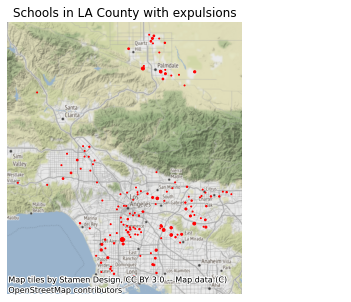

In [134]:
#Then, plot!

# Set the CRS
schoolgdf_final.set_crs(epsg=4326, inplace=True)
print(schoolgdf_final.crs)

# reproject to web mercator
schoolgdf_web_mercator = schoolgdf_final.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(15,5))



schoolgdf_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize='Total Expulsions',#(1.5*n for n in schoolgdf_web_mercator['Total Expulsions']),
                      color='red')

ax.axis('off')

ax.set_title('Schools in LA County with expulsions')

ctx.add_basemap(ax)

## Plotly Express

I used plotly express to create a few helpful bar charts and maps!

First, a map:

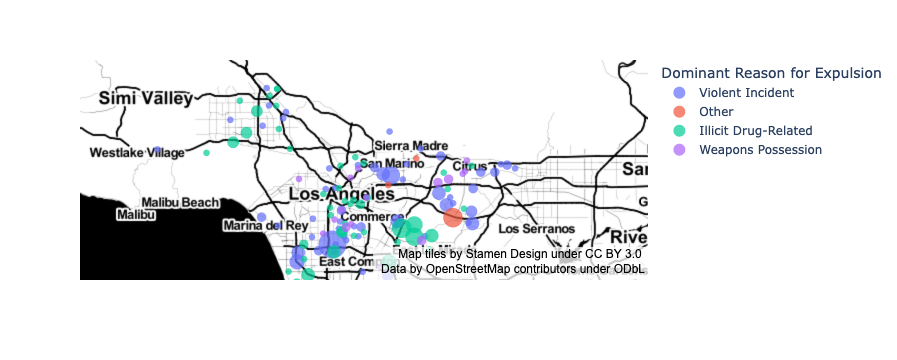

In [135]:
# for interactive plots
import plotly.express as px

fig = px.scatter_mapbox(expgdf_filtered_final,
                        lat='Latitude',
                        lon='Longitude',
                        mapbox_style="stamen-toner",
                        color="Dominant Reason String",
                        labels={'Dominant Reason String':'Dominant Reason for Expulsion'},
                       size='Total Expulsions',
                       hover_name="SchoolName")
fig.show()

Next, a bar chart of total expulsion rates for each school:

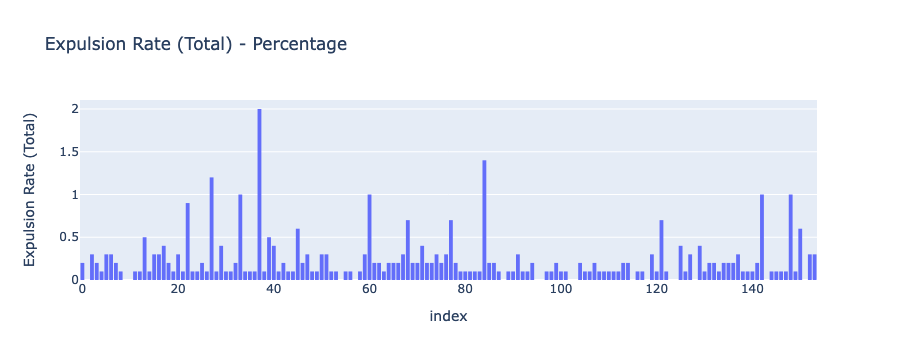

In [136]:
# a simple bar chart of expulsion rates
fig = px.bar(expgdf_filtered_final,
       y='Expulsion Rate (Total)',
       title='Expulsion Rate (Total) - Percentage'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

I also wanted to see the data broken down by expulsion reason:

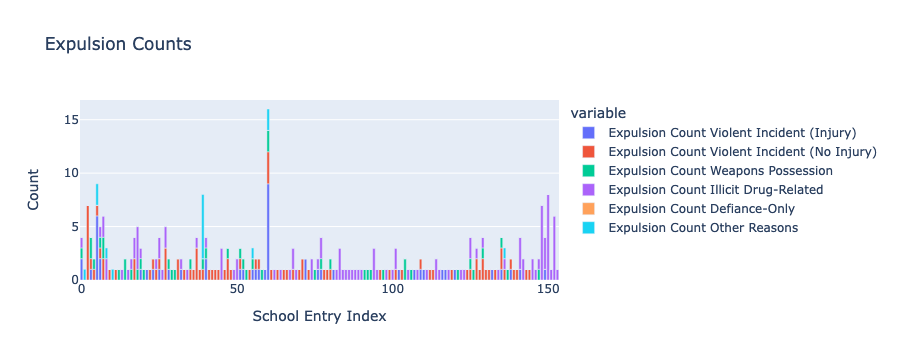

In [137]:
fig = px.bar(expgdf_filtered_final, #x="SchoolName", 
             y=["Expulsion Count Violent Incident (Injury)", 
                "Expulsion Count Violent Incident (No Injury)", 
                "Expulsion Count Weapons Possession",
                "Expulsion Count Illicit Drug-Related",
                "Expulsion Count Defiance-Only",
               "Expulsion Count Other Reasons"], 
             labels={"value": "Count", "index": "School Entry Index"},
             title="Expulsion Counts")

fig.show()

In [138]:
print('Expulsion Count Violent Incident (Injury): ',sum(expgdf_filtered_final['Expulsion Count Violent Incident (Injury)']))
print('Expulsion Count Violent Incident (No Injury): ',sum(expgdf_filtered_final['Expulsion Count Violent Incident (No Injury)']))
print('Expulsion Count Weapons Possession: ',sum(expgdf_filtered_final['Expulsion Count Weapons Possession']))
print('Expulsion Count Illicit Drug-Related: ',sum(expgdf_filtered_final['Expulsion Count Illicit Drug-Related']))
print('Expulsion Count Defiance-Only: ',sum(expgdf_filtered_final['Expulsion Count Defiance-Only']))
print('Expulsion Count Other Reasons: ',sum(expgdf_filtered_final['Expulsion Count Other Reasons']))


Expulsion Count Violent Incident (Injury):  51
Expulsion Count Violent Incident (No Injury):  87
Expulsion Count Weapons Possession:  45
Expulsion Count Illicit Drug-Related:  112
Expulsion Count Defiance-Only:  0
Expulsion Count Other Reasons:  15


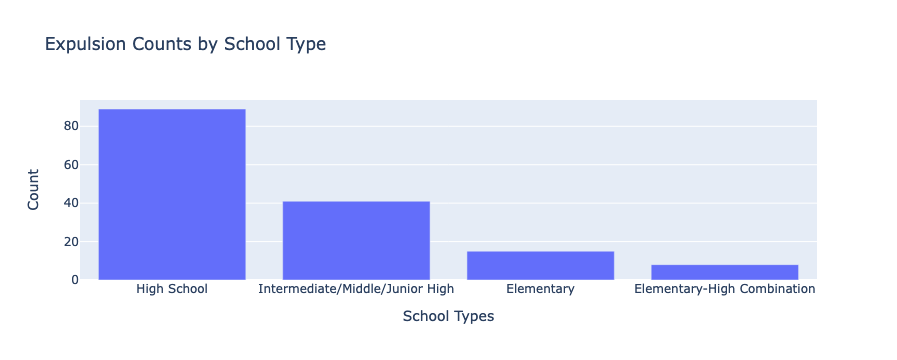

In [139]:
exp_school_type = expgdf_filtered_final.EILName.value_counts()

fig = px.bar(exp_school_type, labels={"value": "Count", "index": "School Types"}, title="Expulsion Counts by School Type")
fig.update(layout_showlegend=False)
fig.show()

# 2. Oil Spills

We are using data from US DOT's website (see <a href="https://www.phmsa.doset Hazardous Liquid Accident Data - January 2010 to presentt.gov/dataand-statistics/pipeline/distribution-transmission-gathering-lng-and-liquid-accident-and-incident-data">here</a>, the set *Hazardous Liquid Accident Data - January 2010 to present*).

This is a national data set.  I started by culling it down to spills that happened in LA county in Excel.

There are also a million columns in this dataset, many of which are empty.  For the purposes of this exercise, I threw away everything not related to location, cost, and damages.

In [140]:
import pandas as pd

# bringing in the data
df = pd.read_csv('LA_spills_rev3.csv')
df

,IYEAR,LOCATION_LATITUDE,LOCATION_LONGITUDE,UNINTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,EST_COST_OPER_PAID,EST_COST_GAS_RELEASED,EST_COST_PROP_DAMAGE,EST_COST_EMERGENCY,EST_COST_ENVIRONMENTAL,EST_COST_OTHER,TOTAL_DAMAGE_COSTS,COSTPAID_ofTOTAL
0,2011,33.460400,-118.120350,4.00,3.80,0,400,0,45000,0,0,45000,0.000000
1,2011,33.461400,-118.121350,4.00,1.00,0,400,4500,3000,0,0,7500,0.000000
2,2011,33.512400,-118.203600,4.10,3.90,0,700,1500,1800,0,0,3300,0.000000
3,2011,33.535200,-118.084200,1.00,0.10,0,100,35000,0,1000,0,36000,0.000000
4,2016,33.734846,-118.272297,0.12,0.12,0,0,600,0,0,0,600,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2011,34.052234,-118.243685,0.50,0.50,0,50,0,12000,0,61000,73000,0.000000
87,2014,34.057767,-118.360143,0.12,0.00,500,25,150000,20000,0,15000,185000,0.002703
88,2010,34.058206,-117.763553,2.50,2.50,0,292,550,31813,32309,0,64672,0.000000
89,2014,34.146191,-118.272341,331.00,331.00,1390480,5100,200000,1419000,75000,0,1694000,0.820826


In [141]:
#exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IYEAR                       91 non-null     int64  
 1   LOCATION_LATITUDE           91 non-null     float64
 2   LOCATION_LONGITUDE          91 non-null     float64
 3   UNINTENTIONAL_RELEASE_BBLS  91 non-null     float64
 4   RECOVERED_BBLS              91 non-null     float64
 5   EST_COST_OPER_PAID          91 non-null     int64  
 6   EST_COST_GAS_RELEASED       91 non-null     int64  
 7   EST_COST_PROP_DAMAGE        91 non-null     int64  
 8   EST_COST_EMERGENCY          91 non-null     int64  
 9   EST_COST_ENVIRONMENTAL      91 non-null     int64  
 10  EST_COST_OTHER              91 non-null     int64  
 11  TOTAL_DAMAGE_COSTS          91 non-null     int64  
 12  COSTPAID_ofTOTAL            91 non-null     float64
dtypes: float64(5), int64(8)
memory usage:

In [142]:
# The lat/long coordinates are float64, which should help us map the spills.

Let's do some preliminary analysis. I'm curious how the spills stack up in terms of quantity.

In [143]:
df['UNINTENTIONAL_RELEASE_BBLS'].describe()

count     91.000000
mean      41.548462
std      120.785645
min        0.100000
25%        0.725000
50%        4.000000
75%       20.000000
max      989.000000
Name: UNINTENTIONAL_RELEASE_BBLS, dtype: float64

So out of 18 spills, the mean amount released was about 79 barrels

That said, there is a lot of range.  The standard deviation is nearly 3x the mean!

It appears the majority of the 18 spills were quite small, but there are a couple HUGE outliers on the larger end.

What are the implications for making scaled spill markers? Will it work out if we have some tiny spill dots and a couple huge ones? Hmmm..

<AxesSubplot:ylabel='Frequency'>

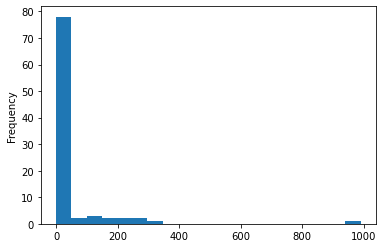

In [144]:
df['UNINTENTIONAL_RELEASE_BBLS'].plot.hist(bins=20)

Hmmmmmmm

Maybe the cost variance is greater?

<AxesSubplot:ylabel='Frequency'>

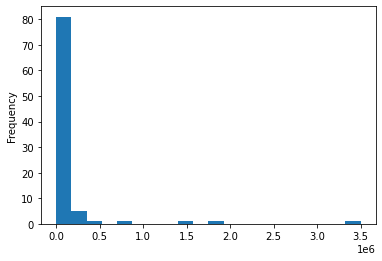

In [145]:
df['EST_COST_ENVIRONMENTAL'].plot.hist(bins=20)

In [146]:
# Well, in hindsight that correlation perhaps shouldn't come as a surprise...

This is a national data set.  I started by culling it down to spills that happened in LA county in Excel.

There are also a million columns in this dataset, many of which are empty.  For the purposes of this exercise, I threw away everything not related to location, cost, and damages.

In [147]:
# let's rename some of the columns

df.columns.to_list()

['IYEAR',
 'LOCATION_LATITUDE',
 'LOCATION_LONGITUDE',
 'UNINTENTIONAL_RELEASE_BBLS',
 'RECOVERED_BBLS',
 'EST_COST_OPER_PAID',
 'EST_COST_GAS_RELEASED',
 'EST_COST_PROP_DAMAGE',
 'EST_COST_EMERGENCY',
 'EST_COST_ENVIRONMENTAL',
 'EST_COST_OTHER',
 'TOTAL_DAMAGE_COSTS',
 'COSTPAID_ofTOTAL']

In [148]:
df.columns = ['YEAR',
 'Lat',
 'Long',
 'Barrels',
 'Barrels_recovered',
 'EST_COST_OPER_PAID',
 'EST_COST_GAS_RELEASED',
 'EST_COST_PROP_DAMAGE',
 'EST_COST_EMERGENCY',
 'EST_COST_ENVIRONMENTAL',
 'EST_COST_OTHER',
 'TOTAL_DAMAGE_COSTS',
 'percent_covered']

In [149]:
# Now, to prepare to make the map, we have to add a geometry column and bring it into geopandas.

gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Long, df.Lat))
gdf

,YEAR,Lat,Long,Barrels,Barrels_recovered,EST_COST_OPER_PAID,EST_COST_GAS_RELEASED,EST_COST_PROP_DAMAGE,EST_COST_EMERGENCY,EST_COST_ENVIRONMENTAL,EST_COST_OTHER,TOTAL_DAMAGE_COSTS,percent_covered,geometry
0,2011,33.460400,-118.120350,4.00,3.80,0,400,0,45000,0,0,45000,0.000000,POINT (-118.12035 33.46040)
1,2011,33.461400,-118.121350,4.00,1.00,0,400,4500,3000,0,0,7500,0.000000,POINT (-118.12135 33.46140)
2,2011,33.512400,-118.203600,4.10,3.90,0,700,1500,1800,0,0,3300,0.000000,POINT (-118.20360 33.51240)
3,2011,33.535200,-118.084200,1.00,0.10,0,100,35000,0,1000,0,36000,0.000000,POINT (-118.08420 33.53520)
4,2016,33.734846,-118.272297,0.12,0.12,0,0,600,0,0,0,600,0.000000,POINT (-118.27230 33.73485)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2011,34.052234,-118.243685,0.50,0.50,0,50,0,12000,0,61000,73000,0.000000,POINT (-118.24368 34.05223)
87,2014,34.057767,-118.360143,0.12,0.00,500,25,150000,20000,0,15000,185000,0.002703,POINT (-118.36014 34.05777)
88,2010,34.058206,-117.763553,2.50,2.50,0,292,550,31813,32309,0,64672,0.000000,POINT (-117.76355 34.05821)
89,2014,34.146191,-118.272341,331.00,331.00,1390480,5100,200000,1419000,75000,0,1694000,0.820826,POINT (-118.27234 34.14619)


In [150]:
# Let's check the coordinate reference system

gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [151]:
# and re-project to web mercator...

gdf_web_mercator = gdf.to_crs(epsg=3857)

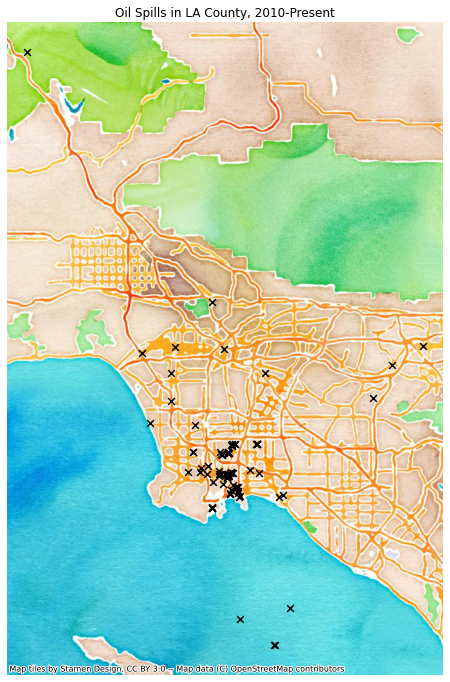

In [152]:
# now we can map it!

fig, ax = plt.subplots(figsize=(12,12))

gdf_web_mercator.plot(ax=ax, 
                      marker='x',
                      markersize=45,
                      color='black')

ax.axis('off')

ax.set_title('Oil Spills in LA County, 2010-Present')

ctx.add_basemap(ax, source=ctx.providers.Stamen.Watercolor)


In [153]:
# let's map with markers scaled to the amount of oil released

# first we'll have to pull the values we're correlating the marker size to

barrels = gdf['Barrels'].tolist()
barrels

[4.0,
 4.0,
 4.1,
 1.0,
 0.12,
 15.0,
 2.0,
 1.3,
 0.48,
 100.0,
 2.98,
 1.0,
 0.5,
 30.0,
 4.6,
 0.5,
 6.0,
 16.0,
 70.0,
 2.66,
 30.0,
 0.2,
 0.28,
 295.0,
 0.6,
 2.0,
 39.0,
 17.0,
 0.24,
 18.7,
 19.6,
 186.0,
 0.1,
 4.5,
 2.0,
 0.75,
 15.0,
 225.0,
 3.48,
 1.0,
 1.0,
 264.0,
 5.0,
 130.0,
 5.5,
 989.0,
 11.02,
 1.0,
 120.0,
 35.0,
 7.8,
 45.0,
 0.1,
 6.71,
 22.8,
 2.76,
 70.0,
 0.1,
 23.9,
 0.2,
 0.7,
 0.3,
 213.0,
 1.0,
 41.0,
 0.7,
 6.0,
 7.0,
 3.0,
 0.5,
 0.83,
 3.0,
 0.6,
 0.24,
 173.0,
 30.0,
 2.38,
 0.36,
 20.0,
 2.9,
 10.0,
 9.0,
 0.6,
 18.0,
 0.1,
 15.0,
 0.5,
 0.12,
 2.5,
 331.0,
 20.0]

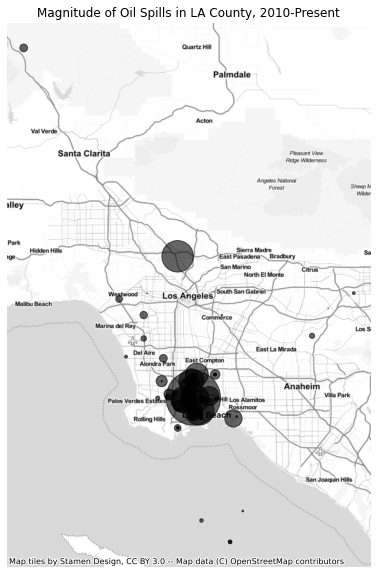

In [154]:
# now we can modify the markersize field with a function based on that list

# we'll also increase the transparency a bit with the alpha field to make the map more legible

fig, ax = plt.subplots(figsize=(10,10))

gdf_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize=[3*n for n in (barrels)],
                      color='black',
                      alpha=0.6)

ax.axis('off')

ax.set_title('Magnitude of Oil Spills in LA County, 2010-Present')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

In [155]:
# We can do this with any other field too by repeating the last two steps.

# Let's check out markers scaled to the total damage costs

totalcosts = gdf['TOTAL_DAMAGE_COSTS'].tolist()
totalcosts

[45000,
 7500,
 3300,
 36000,
 600,
 77900,
 18245,
 10400,
 26000,
 130574,
 10000,
 4300,
 25000,
 18000,
 23000,
 4000,
 365000,
 136000,
 12000,
 19112,
 5500,
 41000,
 1050,
 486000,
 4500,
 62000,
 370000,
 8000,
 250,
 73446,
 91200,
 66092,
 86751,
 15000,
 128000,
 5000,
 381849,
 280000,
 65130,
 79143,
 135500,
 267152,
 260000,
 2890700,
 245000,
 150986,
 12532,
 4500000,
 750000,
 192109,
 165000,
 54000,
 1220000,
 15050,
 430500,
 50000,
 460000,
 203000,
 99000,
 600,
 14019,
 1100,
 1515883,
 250000,
 25000,
 4500,
 32000,
 22000,
 245000,
 10000,
 10000,
 13890,
 38000,
 2000,
 51500,
 858000,
 30000,
 149950,
 1160000,
 45000,
 3106125,
 13000,
 16500,
 6500,
 180000,
 232200,
 73000,
 185000,
 64672,
 1694000,
 794000]

In [156]:
# and the amount that operators paid

costpaid = gdf['EST_COST_OPER_PAID'].tolist()
costpaid

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7000,
 30000,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5000,
 0,
 0,
 0,
 0,
 0,
 0,
 25000,
 0,
 8000,
 0,
 0,
 0,
 0,
 1465,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 20000,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 500,
 0,
 1390480,
 0]

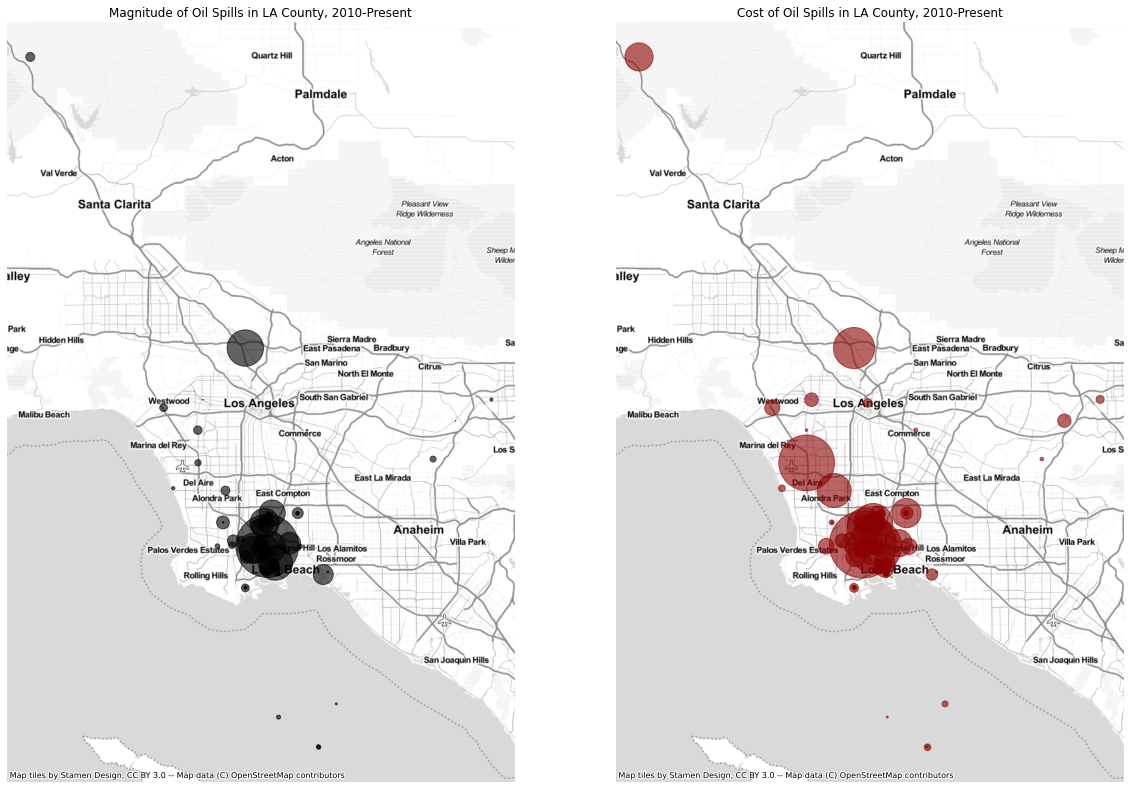

In [157]:
# both maps together
fig, ax = plt.subplots(1,2,figsize=(20,20))

# barrels spilled
gdf_web_mercator.plot(ax=ax[0], 
                      marker='o',
                      markersize=[4*n for n in (barrels)],
                      color='black',
                      alpha=0.6)
ax[0].axis('off')
ax[0].set_title('Magnitude of Oil Spills in LA County, 2010-Present')

ctx.add_basemap(ax[0], source=ctx.providers.Stamen.TonerLite)

# total costs
gdf_web_mercator.plot(ax=ax[1], 
                      marker='o',
                      markersize=[.001*n for n in (totalcosts)],
                      color='darkred',
                      alpha=0.6)
ax[1].axis('off')
ax[1].set_title('Cost of Oil Spills in LA County, 2010-Present')

ctx.add_basemap(ax[1], source=ctx.providers.Stamen.TonerLite)

# Combined Maps

## Static map

Showing both data sets.

In [158]:
# First we need to pull the value list we are going to scale the school data to

expulsions=schoolgdf_final['Total Expulsions'].tolist()

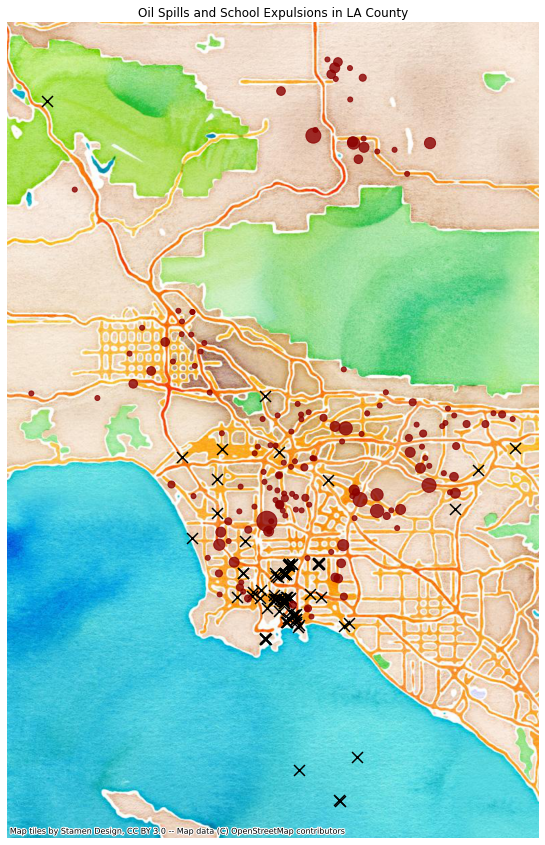

In [159]:
# now we can map it

fig, ax = plt.subplots(figsize=(15,15))

gdf_web_mercator.plot(ax=ax, 
                      marker='x',
                      markersize=120,
                      color='black',
                      alpha=1)

schoolgdf_web_mercator.plot(ax=ax, 
                      marker='o',
                      color="darkred",
                      markersize=[25*n for n in (expulsions)],
                      alpha=0.8)

ax.axis('off')

ax.set_title('Oil Spills and School Expulsions in LA County')

ctx.add_basemap(ax, source=ctx.providers.Stamen.Watercolor)

## Interactive Map

I want to show how school expulsions are distributed geographically and also include information on the reasons students were expelled.

Here is the key I used:

Yellow - "Violent Incident"

Orange -  "Weapons Possession"

Turquoise - "Illicit Drug-Related"

Blue - "Defiance"

Violet - "Other"

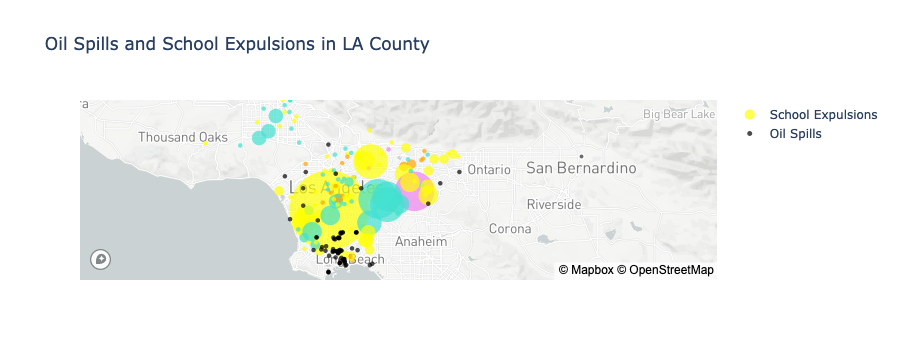

In [160]:
mapbox_access_token = 'pk.eyJ1IjoibGlsbGlhbm1saWFuZyIsImEiOiJja3ZmeWczMG40dm1sMm5xMXU5MGJwNzRnIn0.baSDFspeGlIgKe9s--wqCQ'

# for interactive plots
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

# first, let's add the school data

# put the school expulsion data into vectors!
school_lat = expgdf_filtered_final.Latitude
school_lon = expgdf_filtered_final.Longitude
school_string =  expgdf_filtered_final.SchoolName + " | Total Expulsions: " + expgdf_filtered_final['Total Expulsions'].map(str) + " | Dominant Reason: " + expgdf_filtered_final['Dominant Reason String']

school_size_vec = 5*expgdf_filtered_final['Total Expulsions']
# dictionary in which the key is the column index, and the value is the associated string describing the expulsion reason
color_dict = {"Violent Incident":"yellow",
 "Weapons Possession":"orange", 
 "Illicit Drug-Related":"turquoise", 
 "Defiance":"blue", 
"Other":"violet"}
school_color_vec = expgdf_filtered_final['Dominant Reason String'].map(color_dict)

# put the data on the map
fig.add_trace(go.Scattermapbox(
        lat=school_lat,
        lon=school_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=school_size_vec,
            color=school_color_vec,
            opacity=0.7
        ),
        text=school_string,
        hoverinfo='text',
        name='School Expulsions'
    ))


# now, the oil data. save them into vectors!
oil_lat = df.Lat
oil_lon = df.Long
oil_locations_text = df.YEAR.map(str) + " | Barrels Spilled: " + df.Barrels.map(str) + " | Total Damage Cost: $" + df.TOTAL_DAMAGE_COSTS.map(str) + " | Cost Paid by Corporation: $" + df.EST_COST_OPER_PAID.map(str) 

fig.add_trace(go.Scattermapbox(
        lat=oil_lat,
        lon=oil_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=5,
            color='black',
            opacity=0.7
        ),
        text=oil_locations_text,
        hoverinfo='text',
        name="Oil Spills"
    ))

fig.update_layout(
    title='Oil Spills and School Expulsions in LA County',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=34,
            lon=-118
        ),
        pitch=0,
        zoom=7.5,
        style='light'
    ),
)

# add a key
fig.update(layout_showlegend=True)
fig.show()

In [161]:
fig.write_html("interactive.html")

## Work credits:

## Critical Framework
Lillian had the initial idea to examine carceral data in tandem with oil data.  Jeremy corresponded with team members at Million Dollar Hoods to clarify the goals and shape of the project. Both Lillian and Jeremy have participated in these direction meetings and read STPP literature to understand the pipeline metaphor in conversation with current current scholarship.  Jeremy wrote the first drafts of our project proposals and both J and L edited them in tandem.

## Data analysis
While both members of the team are familiar with all datasets, Lillian is primarily responsible for  dealing with the school data, whereas Jeremy deals mainly with the oil spill data. In this Jupyter Notebook, Lillian and Jeremy independently completed data cleaning, filtering, and analysis of their respective datasets. Jeremy created the combined datasets static map and the 2 oil spill data charts/visualizations, and Lillian created the combined datasets interactive map and the 2 school data charts/visualizations.